In [16]:
from fastai.imports import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.plots import *
from fastai.transforms import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.torch_imports import *
%matplotlib inline

In [17]:
%pwd

'/home/vinay/fastai/courses/dl1'

In [18]:
PATH = '/home/vinay/fastai/data/'

In [19]:
f'{PATH}+train'

'/home/vinay/fastai/data/+train'

In [20]:
y = pd.read_csv(f'{PATH}train.csv')

In [21]:
y.tail()

,Image,Id
9845,ffe5c306.jpg,w_2ceab05
9846,ffeaa7a4.jpg,w_b067417
9847,ffecec63.jpg,w_8b56cb1
9848,fff04277.jpg,w_2dcbf82
9849,fffd4260.jpg,w_b9bfd4e


In [22]:
cou = y.count()

In [23]:
len(y['Id'].unique()) #that's crazy we hardly have couple of examples here for each id

4251

In [24]:
y.pivot_table(index = 'Id',aggfunc=len).sort_values('Image',ascending = False)

,Image
Id,
new_whale,810
w_1287fbc,34
w_98baff9,27
w_7554f44,26
w_1eafe46,23
w_fd1cb9d,22
w_ab4cae2,22
w_693c9ee,22
w_987a36f,21


In [25]:
#so count == 9850
val_idxs = get_cv_idxs(9849)

In [26]:
val_idxs


array([6500, 2523, 3350, ..., 4353, 8773, 6670])

In [27]:
!ls {PATH}

aclImdb  dogscats  sample_submission.csv  test	train  train.csv


In [28]:
??tfms_from_model()

In [29]:


bs = 58
sz = 224
arch = resnext101_64
label_csv = f'{PATH}train.csv'



In [31]:
tfms = tfms_from_model(arch ,sz,aug_tfms = transforms_side_on,max_zoom = 1.1)
data = ImageClassifierData.from_csv(PATH,'train',f'{PATH}train.csv',
                                    tfms = tfms,bs = bs,val_idxs = val_idxs,test_name='test')


In [37]:
fname = PATH + data.trn_ds.fnames[4]
fname

'/home/vinay/fastai/data/train/0026a8ab.jpg'

In [39]:
img = PIL.Image.open(fname)

In [40]:
img.size

(1050, 317)

In [41]:
size_d = {k: PIL.Image.open(PATH+k).size for k in data.trn_ds.fnames}

In [44]:
size_d

{'train/000466c4.jpg': (1050, 700),
 'train/00087b01.jpg': (1050, 368),
 'train/0014cfdf.jpg': (700, 398),
 'train/0025e8c2.jpg': (1000, 652),
 'train/0026a8ab.jpg': (1050, 317),
 'train/0031c258.jpg': (1050, 456),
 'train/0035632e.jpg': (843, 400),
 'train/0037e7d3.jpg': (1050, 700),
 'train/0042dcc4.jpg': (1050, 367),
 'train/00467ae9.jpg': (1000, 667),
 'train/004c5fb9.jpg': (1050, 422),
 'train/005c57e7.jpg': (831, 475),
 'train/0078af23.jpg': (1050, 600),
 'train/00863b8c.jpg': (858, 368),
 'train/008809b5.jpg': (1050, 327),
 'train/008baccf.jpg': (1050, 316),
 'train/009dca38.jpg': (677, 247),
 'train/00a29f63.jpg': (1050, 367),
 'train/00aa021c.jpg': (746, 497),
 'train/00ab018e.jpg': (1050, 327),
 'train/00ac0e86.jpg': (1050, 525),
 'train/00af84d8.jpg': (700, 500),
 'train/00b2c0cd.jpg': (1050, 478),
 'train/00b7de10.jpg': (1050, 319),
 'train/00be7f73.jpg': (1050, 600),
 'train/00d3d48c.jpg': (1050, 346),
 'train/00ded600.jpg': (1050, 487),
 'train/00eab0e6.jpg': (671, 382),


In [48]:
size_d.values()

dict_values([(1050, 700), (1050, 368), (700, 398), (1000, 652), (1050, 317), (1050, 456), (843, 400), (1050, 700), (1050, 367), (1000, 667), (1050, 422), (831, 475), (1050, 600), (858, 368), (1050, 327), (1050, 316), (677, 247), (1050, 367), (746, 497), (1050, 327), (1050, 525), (700, 500), (1050, 478), (1050, 319), (1050, 600), (1050, 346), (1050, 487), (671, 382), (1050, 250), (1050, 700), (1050, 700), (949, 542), (1050, 700), (1050, 307), (1050, 600), (1050, 416), (709, 351), (1050, 349), (1050, 600), (1050, 601), (1050, 700), (1050, 270), (1050, 655), (1050, 488), (1050, 525), (1050, 700), (540, 308), (740, 423), (1050, 700), (660, 472), (1050, 600), (1050, 525), (995, 572), (1050, 310), (1050, 282), (1050, 600), (1050, 600), (1050, 291), (1050, 630), (1050, 700), (1050, 551), (1050, 630), (750, 811), (700, 500), (839, 479), (840, 440), (1050, 700), (1050, 600), (639, 274), (1050, 344), (1050, 700), (883, 539), (1050, 525), (934, 401), (1003, 429), (829, 233), (700, 368), (1050, 50

In [47]:
row_size,col_size = list(zip(*size_d.values()))

In [49]:
row_size

(1050,
 1050,
 700,
 1000,
 1050,
 1050,
 843,
 1050,
 1050,
 1000,
 1050,
 831,
 1050,
 858,
 1050,
 1050,
 677,
 1050,
 746,
 1050,
 1050,
 700,
 1050,
 1050,
 1050,
 1050,
 1050,
 671,
 1050,
 1050,
 1050,
 949,
 1050,
 1050,
 1050,
 1050,
 709,
 1050,
 1050,
 1050,
 1050,
 1050,
 1050,
 1050,
 1050,
 1050,
 540,
 740,
 1050,
 660,
 1050,
 1050,
 995,
 1050,
 1050,
 1050,
 1050,
 1050,
 1050,
 1050,
 1050,
 1050,
 750,
 700,
 839,
 840,
 1050,
 1050,
 639,
 1050,
 1050,
 883,
 1050,
 934,
 1003,
 829,
 700,
 1050,
 1050,
 924,
 1050,
 590,
 1050,
 1050,
 1050,
 1050,
 600,
 1050,
 963,
 1050,
 1050,
 1050,
 1050,
 1050,
 1050,
 1050,
 1050,
 1050,
 1050,
 1050,
 1050,
 1050,
 681,
 863,
 1050,
 1050,
 1050,
 1050,
 1050,
 1050,
 1050,
 1050,
 700,
 1050,
 1050,
 1050,
 1050,
 982,
 746,
 1050,
 1050,
 1050,
 1050,
 1050,
 1050,
 1050,
 670,
 1050,
 1050,
 646,
 700,
 1050,
 1050,
 1050,
 1050,
 700,
 1050,
 1050,
 1050,
 1050,
 922,
 1050,
 1050,
 1050,
 1050,
 1050,
 943,
 1050,
 1

In [50]:
row_size = np.array(row_size)
col_size = np.array(col_size)

(array([   2.,   28.,   55.,   71.,  151.,  190.,  621.,  319.,  402., 6042.]),
 array([ 107. ,  201.3,  295.6,  389.9,  484.2,  578.5,  672.8,  767.1,  861.4,  955.7, 1050. ]),
 <a list of 10 Patch objects>)

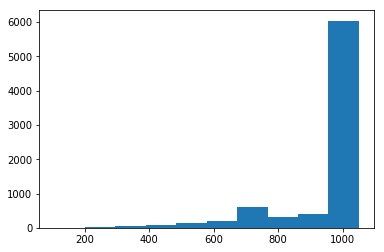

In [51]:
plt.hist(row_size)

(array([ 328., 1989., 2479., 1994., 1064.,   12.,    4.,    1.,    3.,    7.]),
 array([  61. ,  216.2,  371.4,  526.6,  681.8,  837. ,  992.2, 1147.4, 1302.6, 1457.8, 1613. ]),
 <a list of 10 Patch objects>)

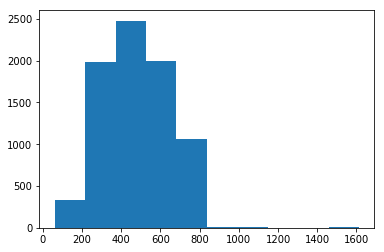

In [52]:
plt.hist(col_size)